# Lab 10 - Extended Exercises on Clustering

One of the key parameters in spectral clustering is the gamma parameter of the RBF kernel used to compute the similarity matrix. The gamma parameter controls the width of the Gaussian kernel and can have a significant impact on the clustering results, particularly in the presence of outliers.

In this lab, we will explore the impact of the gamma parameter on the clustering results. 

### Task 1: Generate a dataset with outliers.
Complete the function generate_data_with_outliers and plot the clusters and outliers.

Hint: You may use the function make_blobs from scikit-learn.

In [27]:
import matplotlib.pyplot as plt
# import make_blobks from scikit-learn
from sklearn.datasets import make_blobs
import numpy as np

def generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = 1):
    """Generate synthetic data with outliers for clustering.

    Parameters
    ----------
    groups : int
        The number of groups or clusters in the generated data.
    samples : int
        The total number of samples to be generated, including the outliers.
    percentage_outliers : float
        The percentage of outliers to be included in the generated data, as a float between 0 and 1.
    cluster_std (optional): float
        Standard deviation parameter for make_blobs
    Returns
    -------
    X : numpy.ndarray, shape (samples, 2)
        The generated data points, including the outliers.
    y : numpy.ndarray, shape (samples,)
        The labels assigned to each data point, including the outliers. The label values are integers from 0 to
        `groups`, and the outliers are assigned the value `groups+1`.
    """
    # generate data using make_blobs
    X, y = make_blobs(n_samples=samples, centers=groups, cluster_std=cluster_std, random_state=42)
    # determine the number of outliers
    n_outliers = int(percentage_outliers * samples)
    # Generate outliers and append them to the data
    print(np.array([np.max(X[:, 0]), np.max(X[:, 1])]) )
    print(np.array([np.min(X[:, 0]), np.min(X[:, 1])]))
    X_outliers = np.random.rand(n_outliers, 2) * np.array([np.max(X[:, 0]), np.max(X[:, 1])]) + np.random.rand(n_outliers, 2) * np.array([np.min(X[:, 0]), np.min(X[:, 1])])
    X = np.vstack((X, X_outliers))
    # Generate outlier labels and append them to the labels
    y_outliers = np.ones(n_outliers) * (groups + 1)
    y = np.hstack((y, y_outliers))
    return X, y


[ 7.46915769 11.7927034 ]
[-9.29085204 -9.15238043]


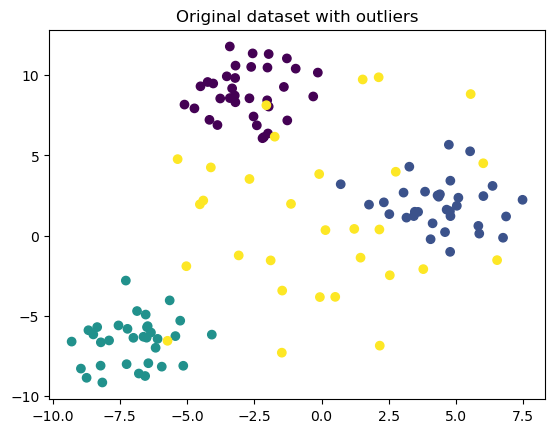

In [30]:
# Plot the dataset
groups = 3
samples = 100
percentage_outliers = 0.3
cluster_std = 1.5

X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Original dataset with outliers")
plt.show()

## Task 2: Perform spectral clustering with different gamma values 

Perform spectral clustering with different gamma values (e.g., 0.01, 0.1, 1, 10, and 100). Plot the clustering results for each gamma value and display the silhouette score for each clustering.

In [53]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

def plot_spectral_clustering(X, groups, gamma_values):
    """
    Perform spectral clustering with different gamma values on the input dataset X, 
    and plot the clustering results for each gamma value along with the corresponding silhouette score.
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input dataset to perform clustering on.
        
    groups : int
        The number of groups to cluster the input data into.
    
    gamma_values : list of floats
        The gamma values to use for spectral clustering. Each gamma value will result in one plot in the
        output figure.
    
    Returns:
    --------
    None
        The function generates a plot with subplots for each gamma value, showing the clustering results and
        the silhouette score for each clustering.
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(3, len(gamma_values)//2, figsize=(15, 20))
    # Loop over the gamma values
    for i, gamma in enumerate(gamma_values):
        row = i // (len(gamma_values)//2)
        col = i % (len(gamma_values)//2)
        # Perform spectral clustering
        sc = SpectralClustering(n_clusters=groups, gamma=gamma)
        y_pred = sc.fit_predict(X)
        # print unique labels
        print("Unique labels for gamma = " + str(gamma) + ": " + str(np.unique(y_pred)))
        # Plot the clustering results
        axes[row,col].scatter(X[:, 0], X[:, 1], c=y_pred)
        axes[row,col].set_title("gamma = " + str(gamma))
        # Compute the silhouette score
        score = silhouette_score(X, y_pred)
        axes[row,col].set_xlabel("Silhouette score: " + str(score))
    plt.show()



Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 851 with accuracies 
[3.47362393e-06 1.09626085e-13 1.74547112e-06 1.06258068e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 545 instead with accuracy 
1.4393093042170336e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[7.29968088e-15 6.90434181e-07 3.46757544e-06 1.59119042e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [0 1 2]


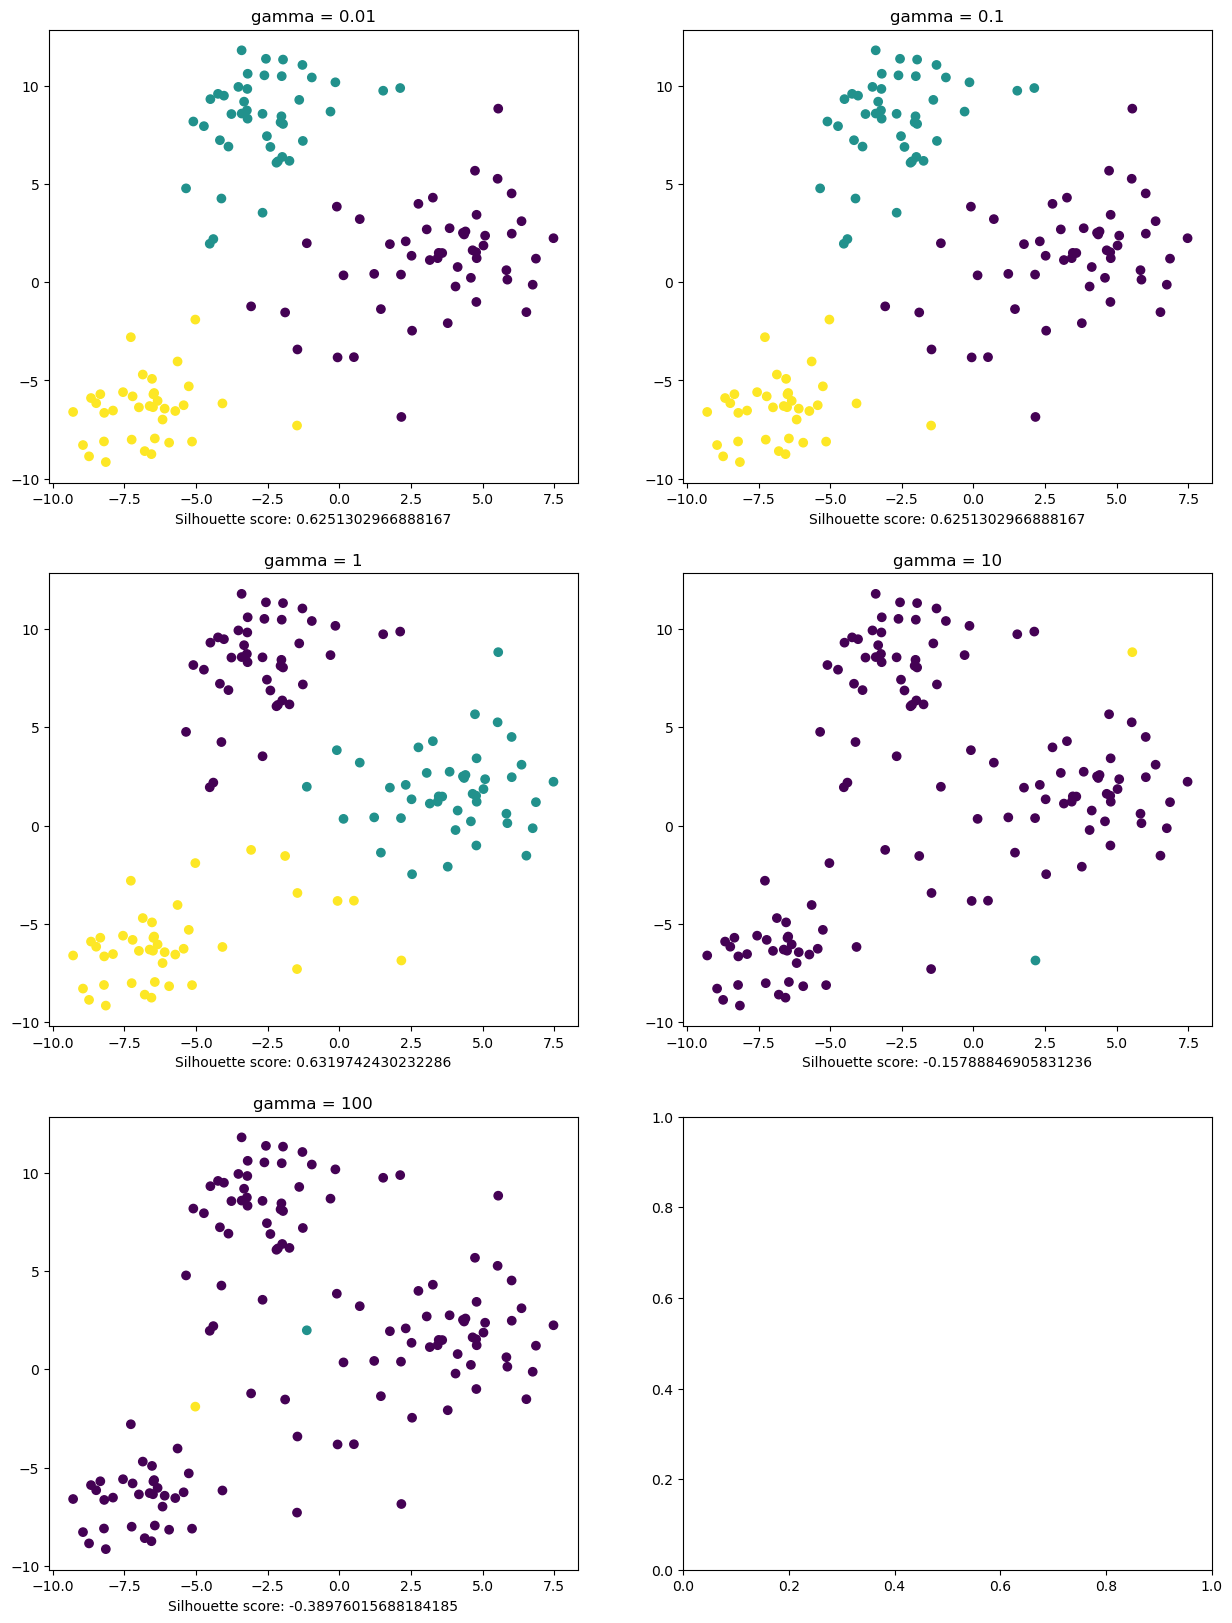

In [54]:
gamma_values = [0.01, 0.1, 1, 10, 100]
plot_spectral_clustering(X, groups, gamma_values)

### Task 3: Explore the different parameters
How do the results vary with greater/smaller percentage of outliers? 
What is the effect of the clustering standard deviation? 
How is the effect of the group size (sample)?

### Effect of percentage_outliers

[ 7.46915769 11.7927034 ]
[-9.29085204 -9.15238043]


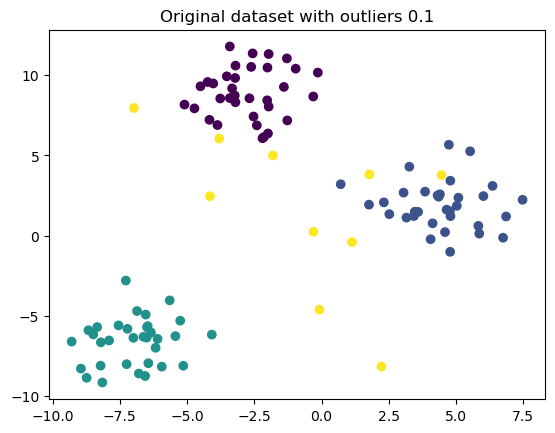

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[3.87059622e-13 2.86885749e-07 4.55156139e-07 2.43827928e-05]
not reaching the requested tolerance 1.6391277313232422e-06.
Use iteration 1440 instead with accuracy 
2.895200711532333e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.28299181e-14 3.22517628e-07 4.06956158e-07 1.08518303e-05]
not reaching the requested tolerance 1.6391277313232422e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [0 1 2]


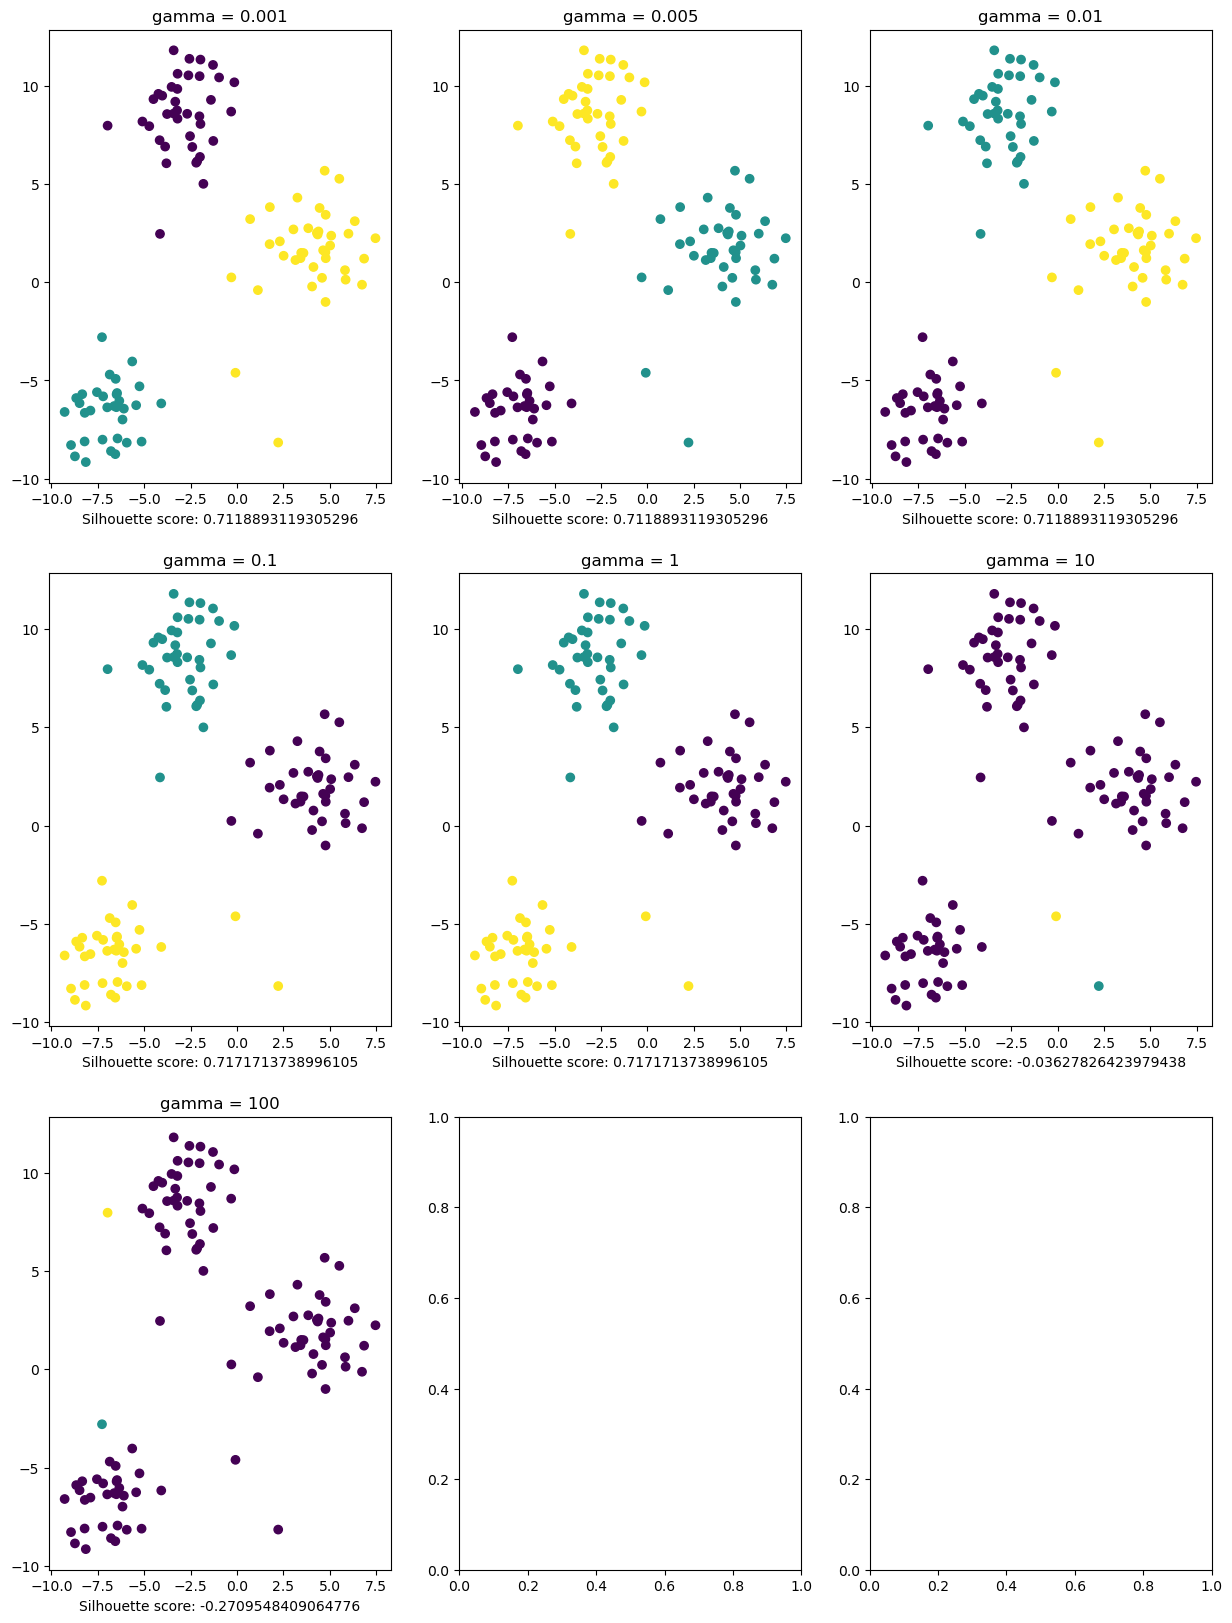

[ 7.46915769 11.7927034 ]
[-9.29085204 -9.15238043]


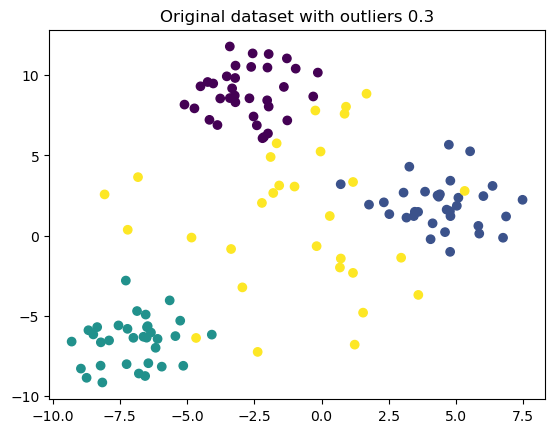

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[2.78769576e-14 2.37450586e-07 4.48220690e-07 6.18695469e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 1948 instead with accuracy 
6.993999045783842e-07.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[7.51119117e-15 2.32845304e-07 4.49175257e-07 2.11557973e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 10: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 1097 with accuracies 
[6.10785962e-11 2.42839083e-06 6.96521597e-07 1.88004559e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 1097 instead with accuracy 
1.251254773717775e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.20099255e-12 2.42839217e-06 6.96516919e-07 1.88004558e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(


Unique labels for gamma = 100: [0 1 2]


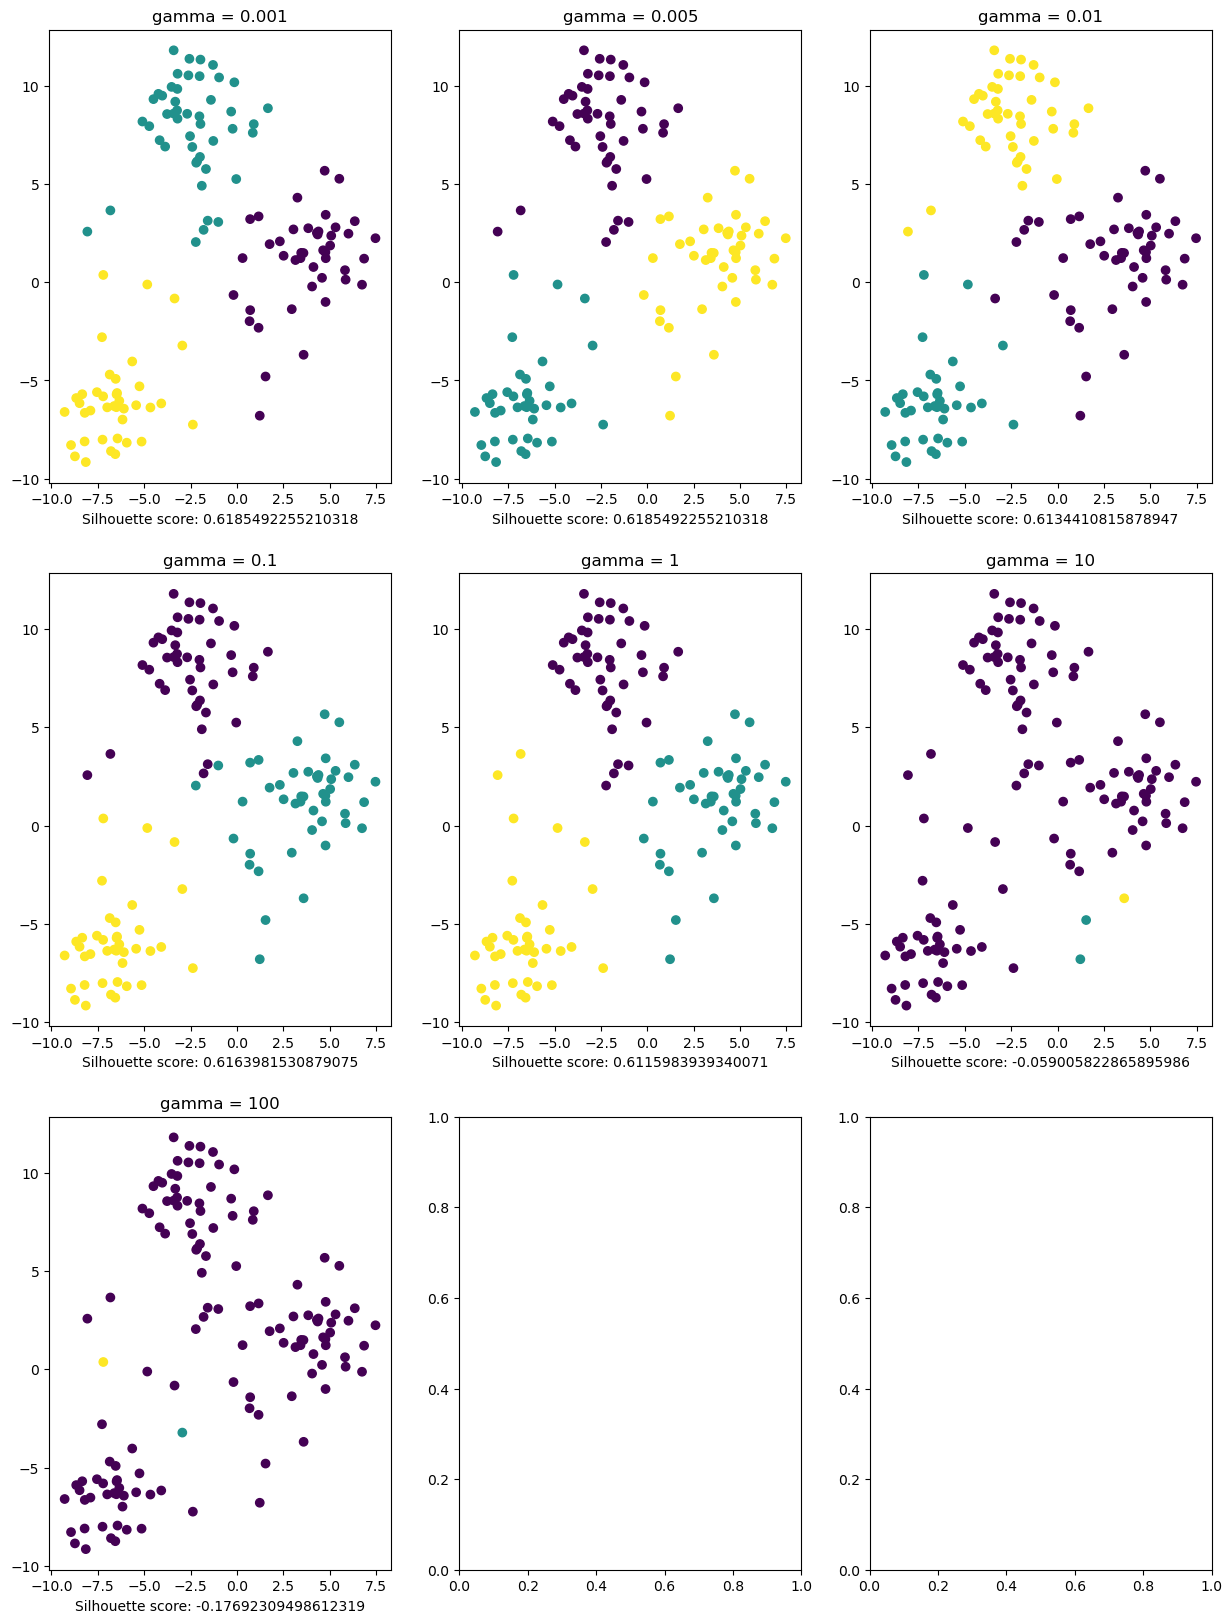

[ 7.46915769 11.7927034 ]
[-9.29085204 -9.15238043]


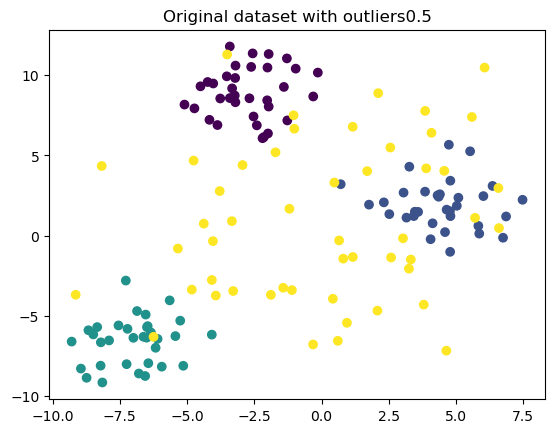

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]
Unique labels for gamma = 10: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


Unique labels for gamma = 100: [1 2]


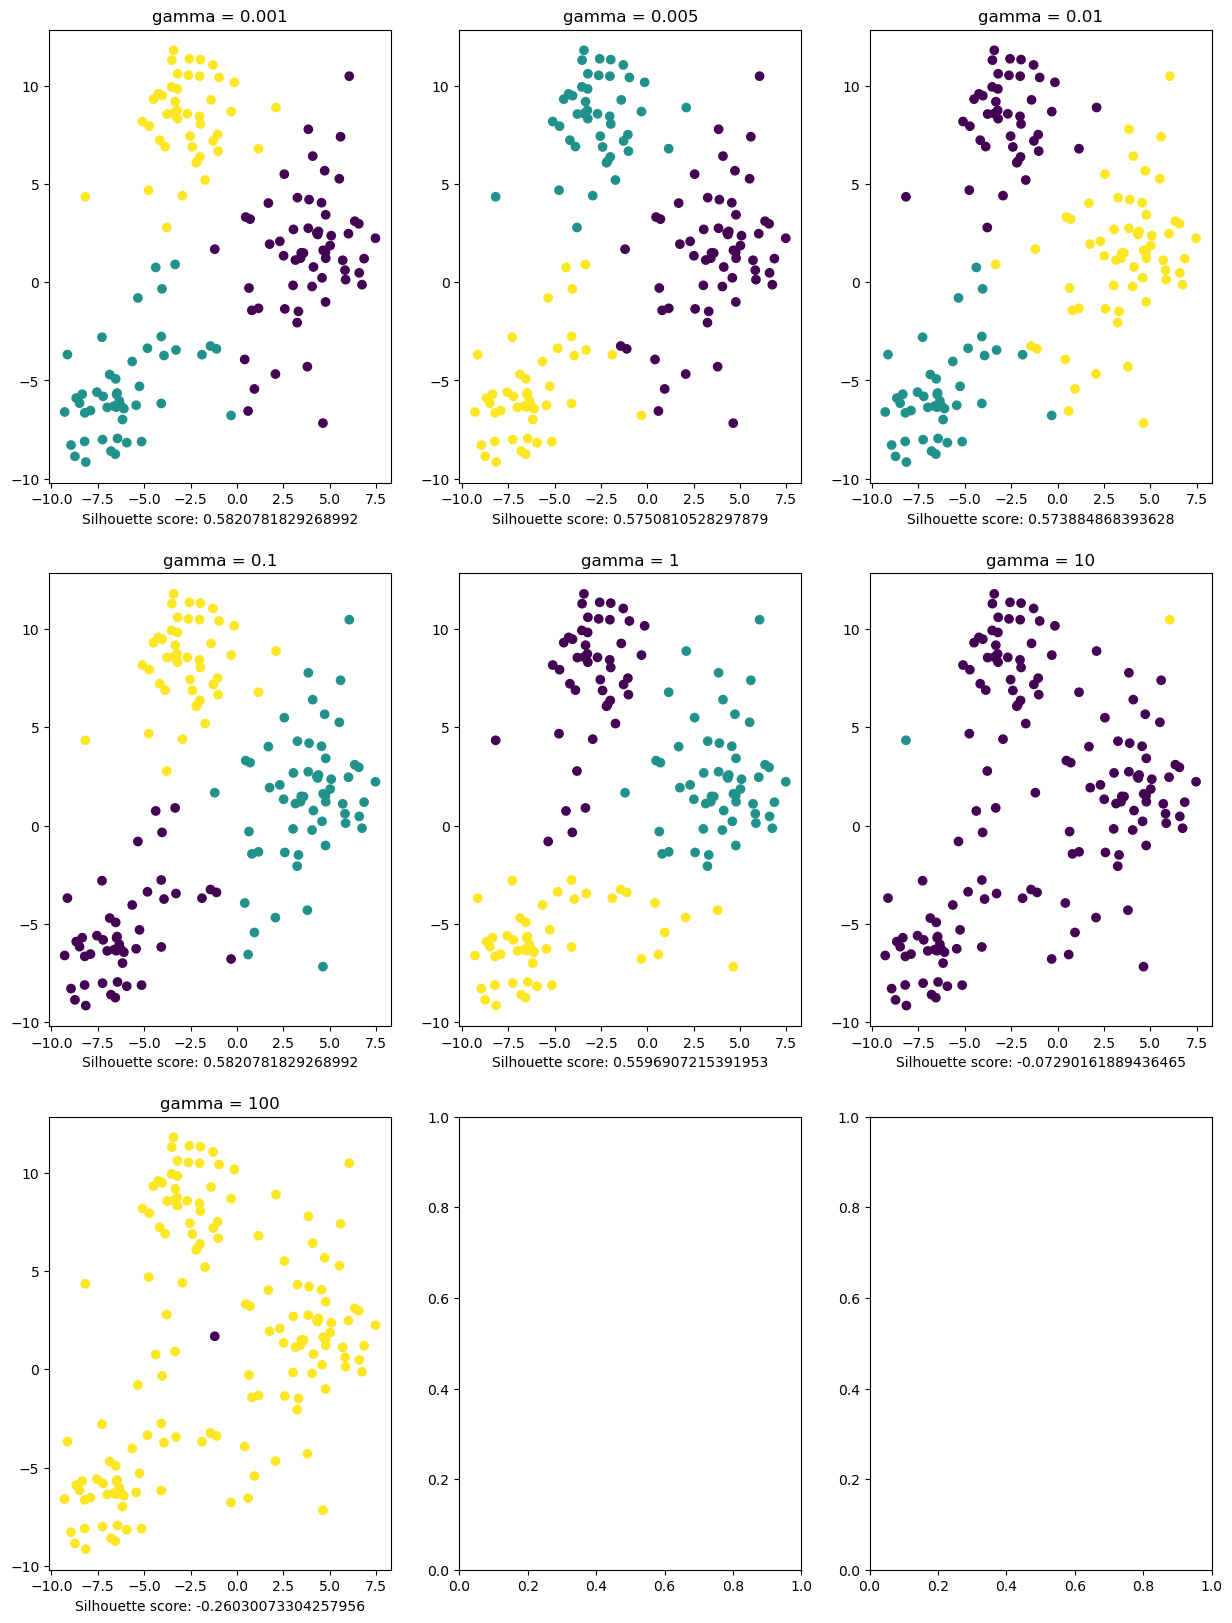

[ 7.46915769 11.7927034 ]
[-9.29085204 -9.15238043]


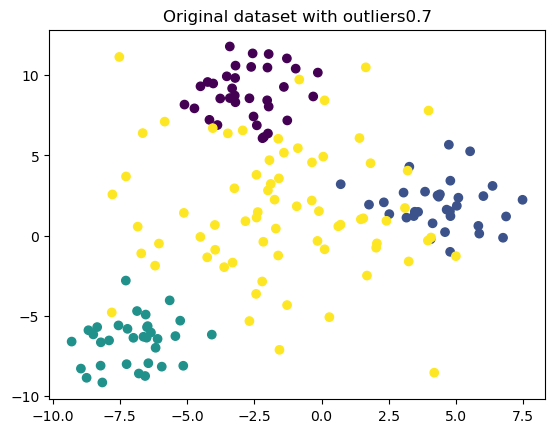

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.85409847e-14 6.81687567e-07 5.69659206e-07 1.46889899e-05]
not reaching the requested tolerance 2.5331974029541016e-06.
Use iteration 1280 instead with accuracy 
2.2086047919335604e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[5.32958663e-15 9.64758561e-07 6.98085631e-07 7.17168265e-06]
not reaching the requested tolerance 2.5331974029541016e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: U

Unique labels for gamma = 10: [0 1]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[5.84511313e-12 1.57247841e-07 1.27206936e-06 8.99400951e-06]
not reaching the requested tolerance 2.5331974029541016e-06.
Use iteration 906 instead with accuracy 
1.2219555664776225e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.08498629e-14 1.89227975e-07 1.29532465e-06 3.40326261e-06]
not reaching the requested tolerance 2.5331974029541016e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


Unique labels for gamma = 100: [0 1]


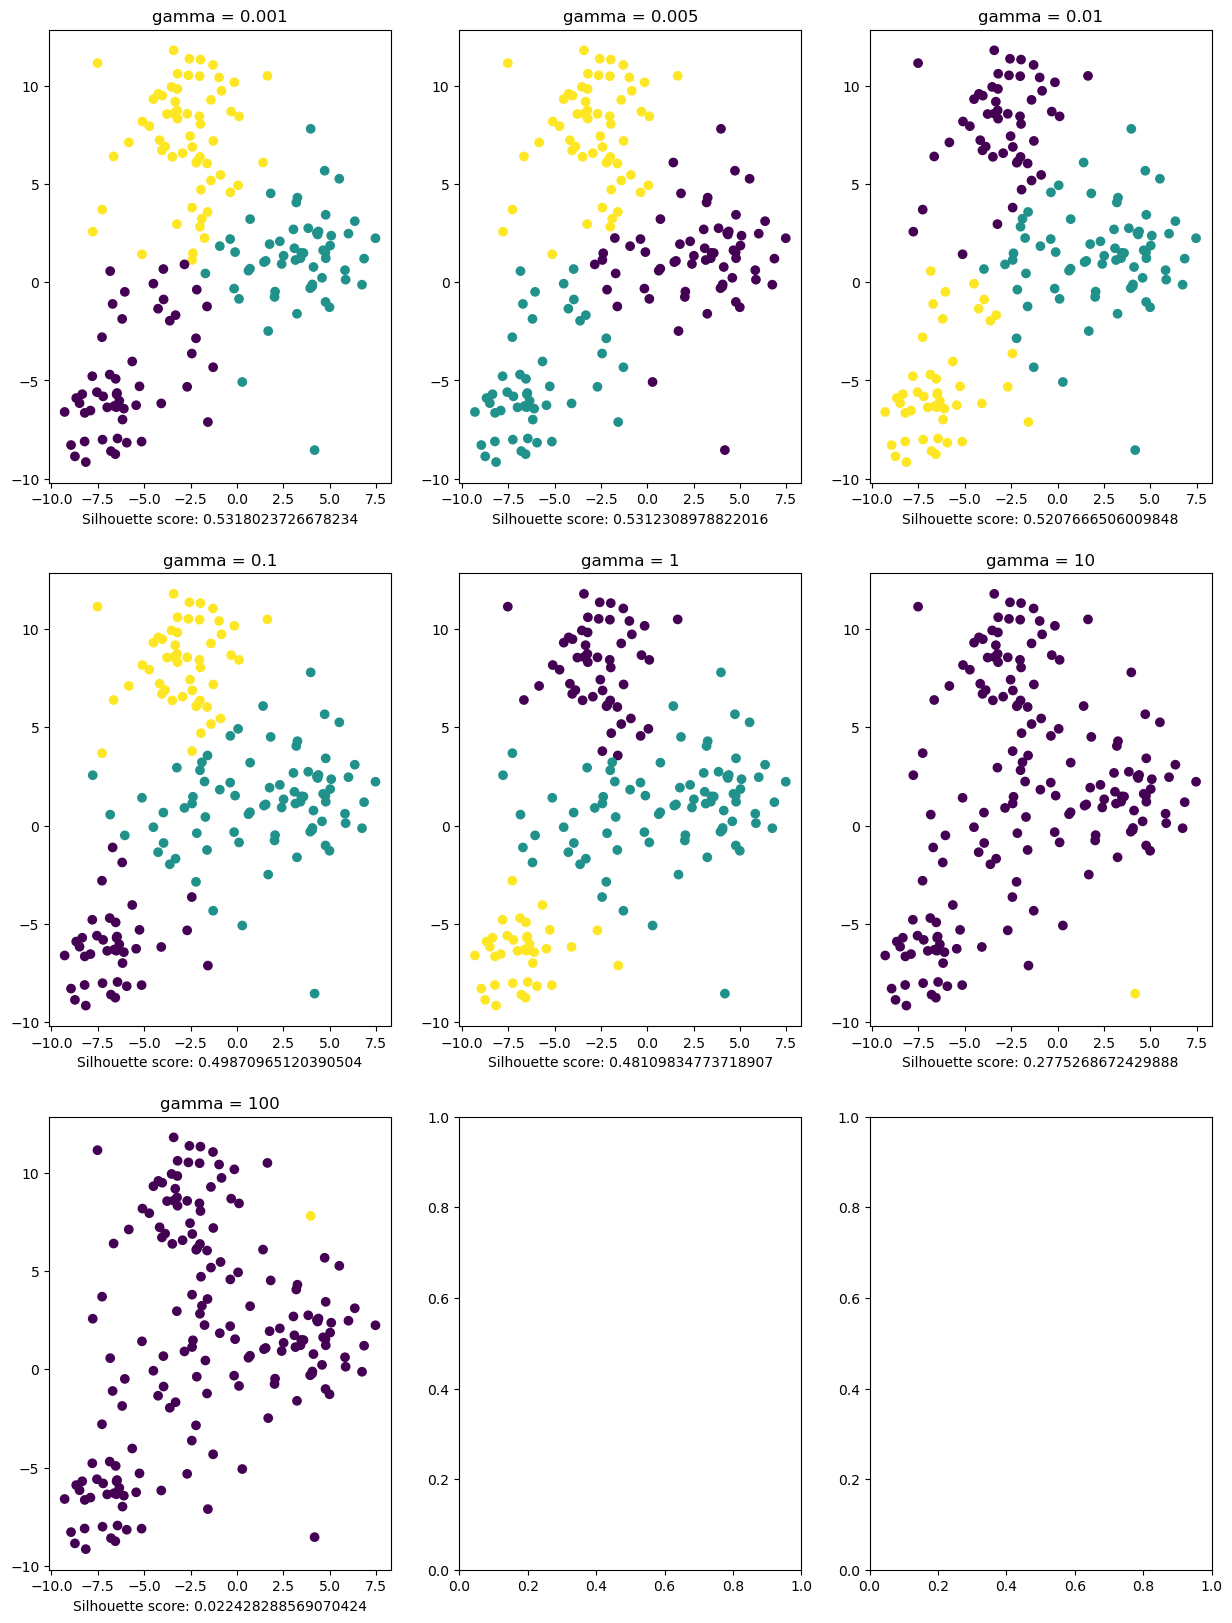

In [57]:
groups = 3
samples = 100
percentage_outliers = 0.3
cluster_std = 1.5
gamma_values = [0.001, 0.005, 0.01, 0.1, 1, 10, 100]

# Effect of percentage of outliers
percentage_outliers = 0.1
X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Original dataset with outliers " + str(percentage_outliers))
plt.show()

plot_spectral_clustering(X, groups, gamma_values)
######################################
percentage_outliers = 0.3
X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Original dataset with outliers " + str(percentage_outliers))
plt.show()

plot_spectral_clustering(X, groups, gamma_values)
######################################
percentage_outliers = 0.5
X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Original dataset with outliers" + str(percentage_outliers))
plt.show()

plot_spectral_clustering(X, groups, gamma_values)
######################################
percentage_outliers = 0.7
X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Original dataset with outliers" + str(percentage_outliers))
plt.show()

plot_spectral_clustering(X, groups, gamma_values)



### Effects of clustering standard deviation

[4.82849743 9.19951395]
[-7.04037551 -7.03159432]


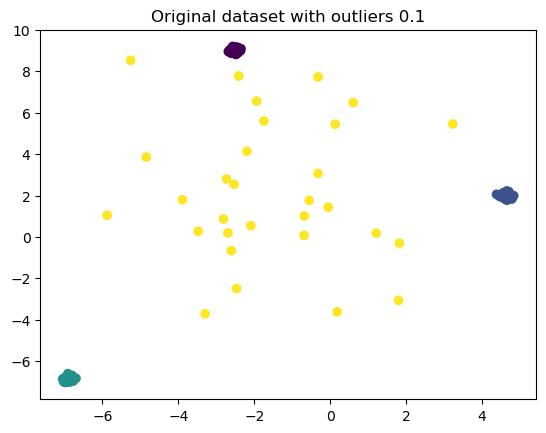

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]
Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [0 1]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


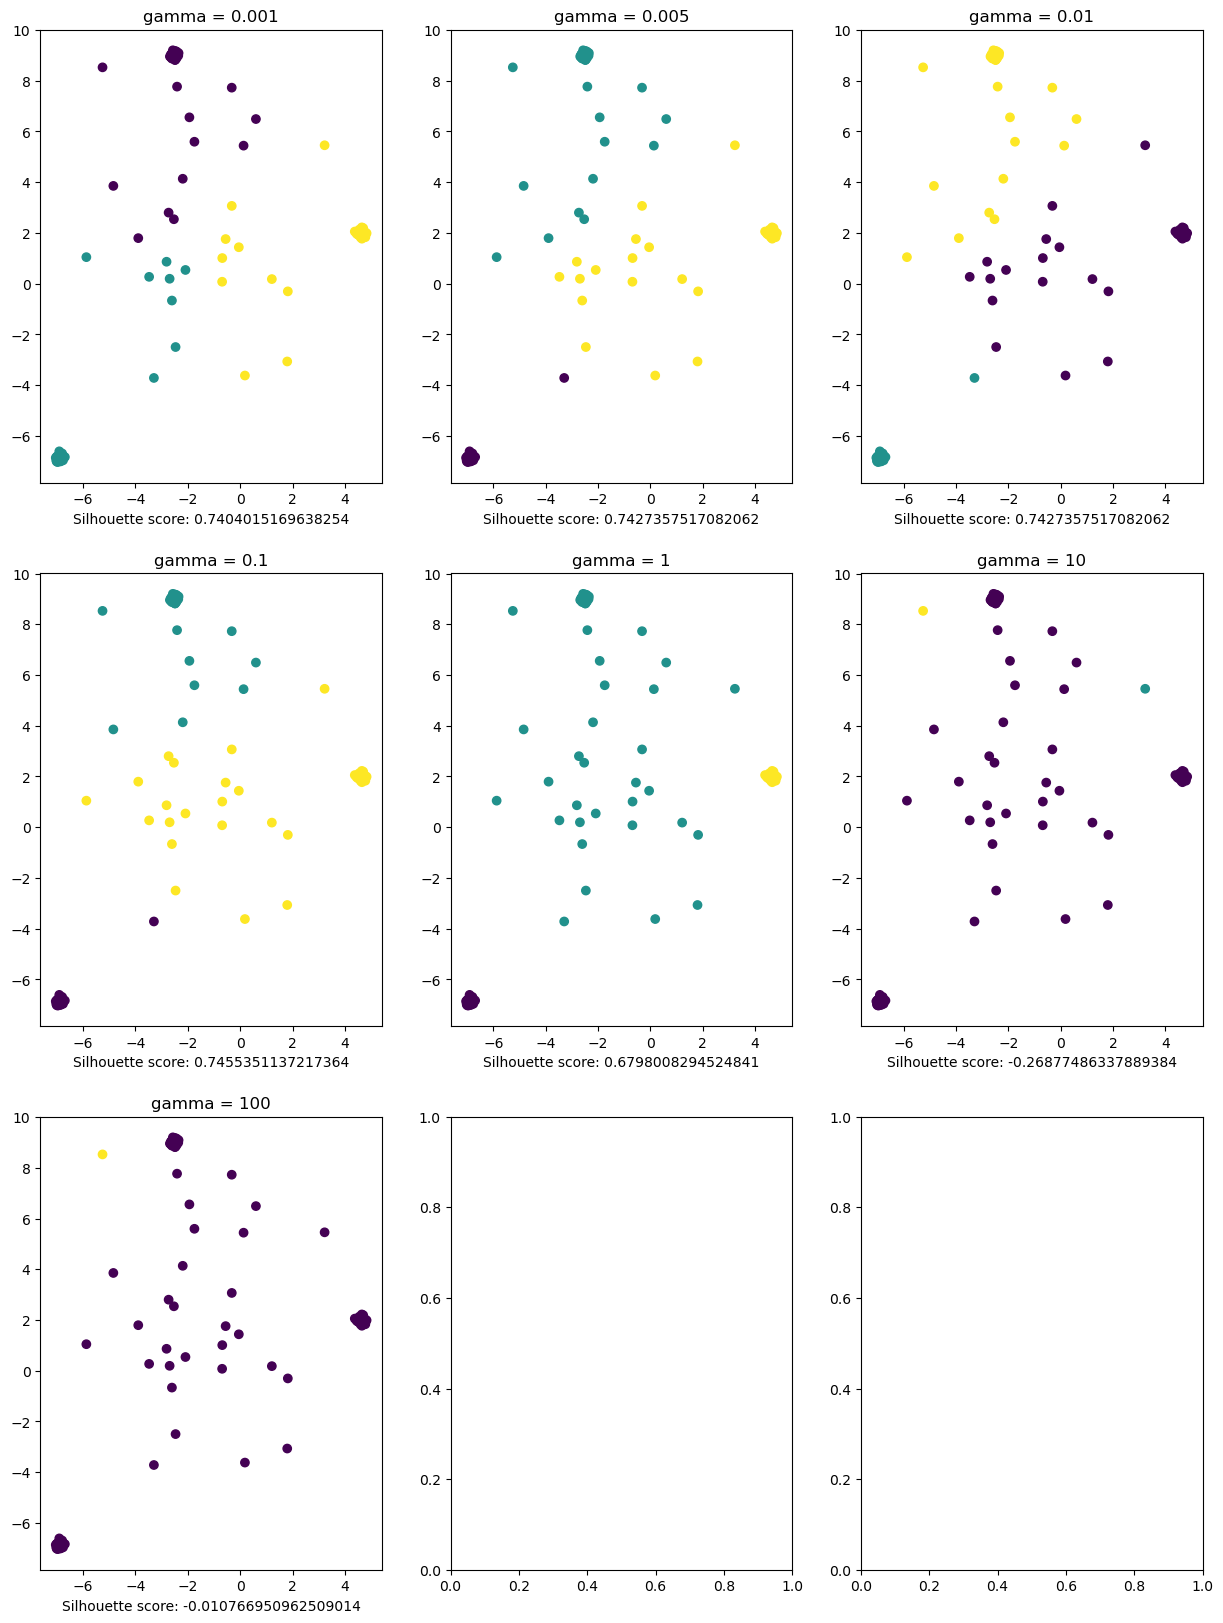

[5.58297179 9.94042522]
[-7.68336881 -7.63753321]


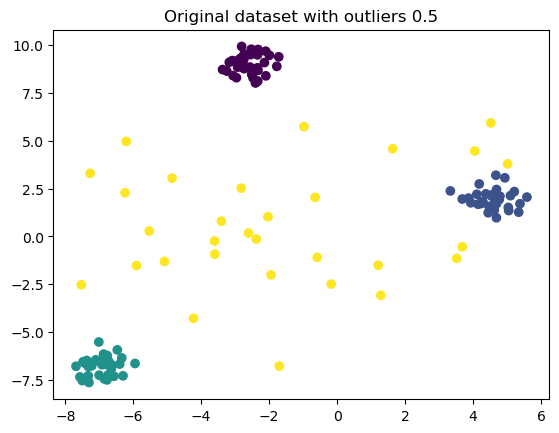

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 103 with accuracies 
[2.31702761e-12 9.61207836e-07 4.69378012e-06 1.53384928e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 103 instead with accuracy 
1.797209887744252e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.69051169e-13 9.61207885e-07 4.69378011e-06 1.53384928e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 10: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


Unique labels for gamma = 100: [0 1]


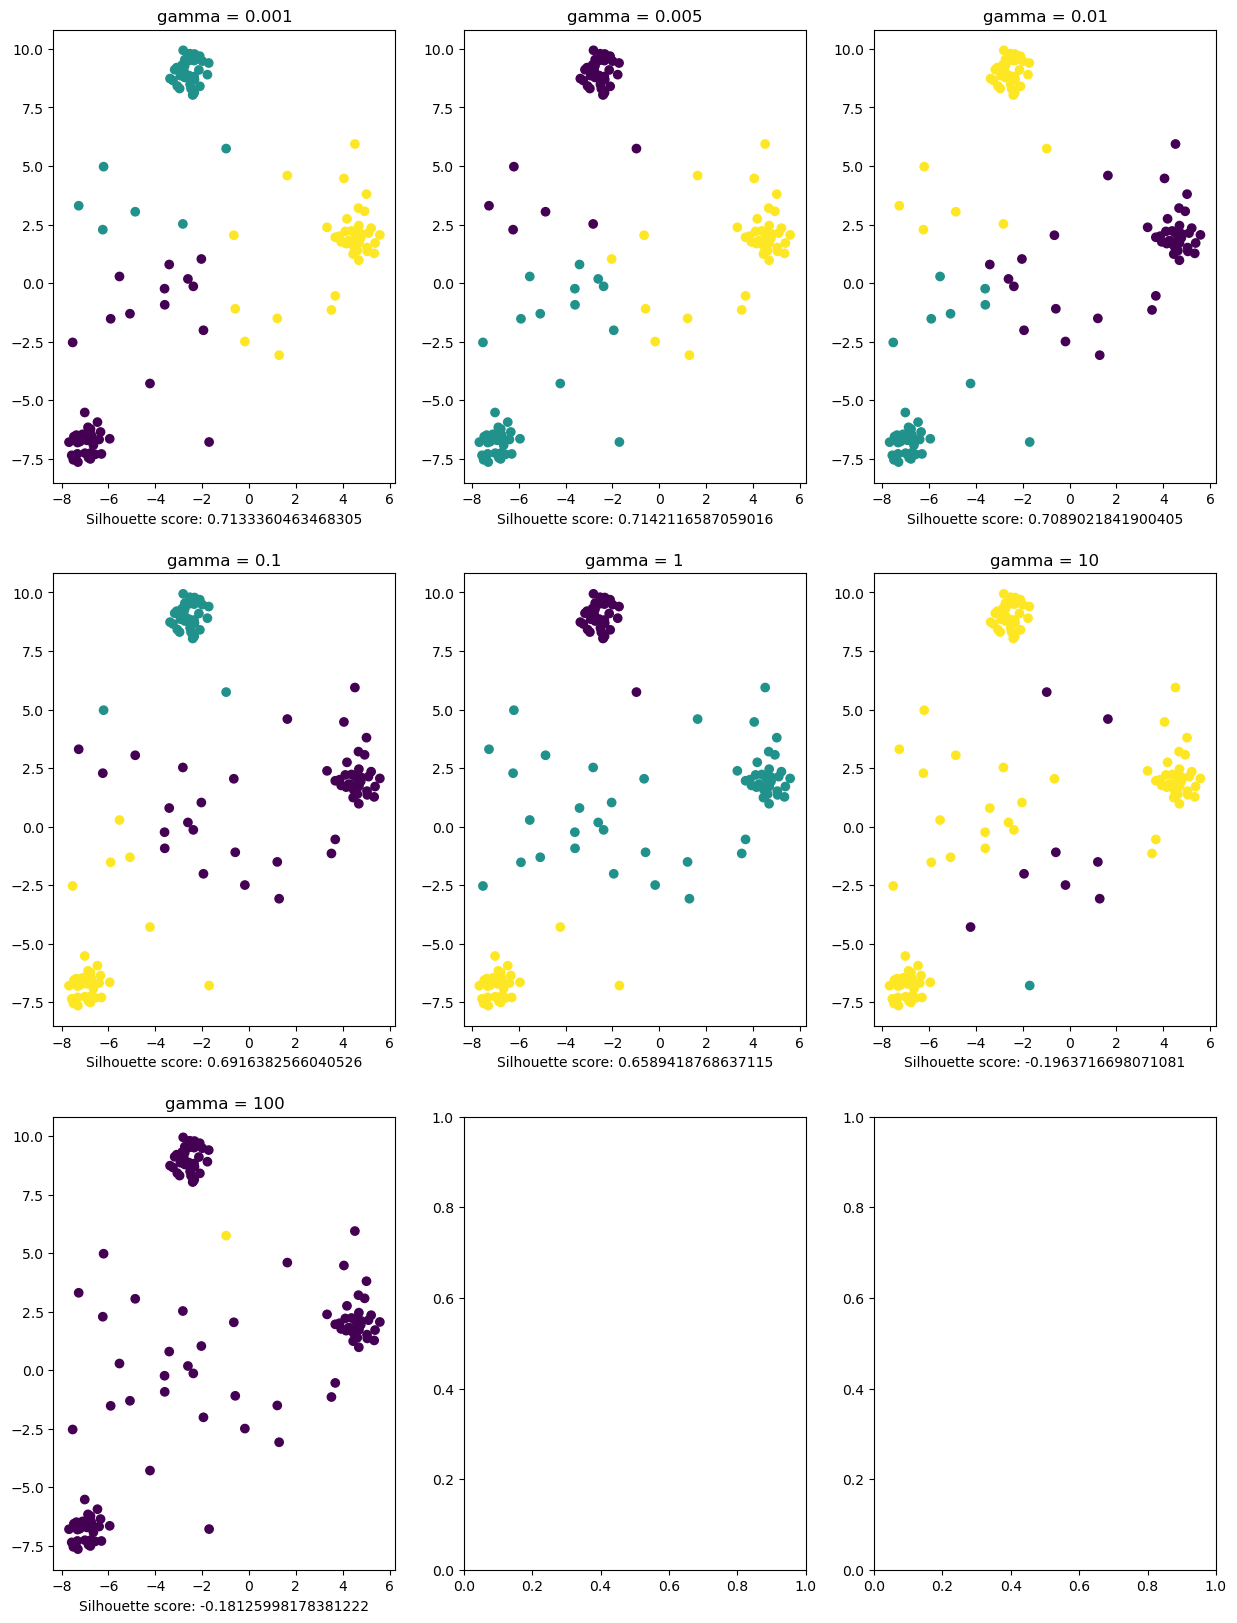

[ 6.52606474 10.86656431]
[-8.48711043 -8.39495682]


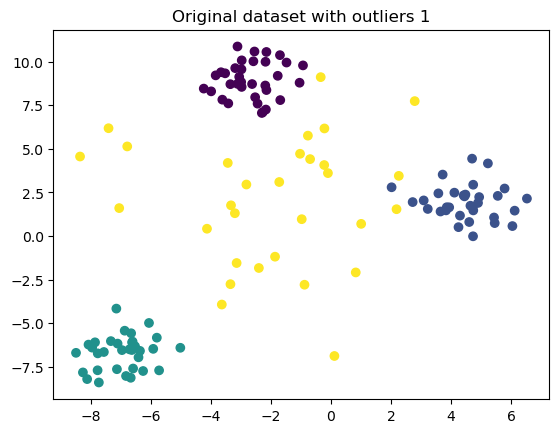

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 10: [0 1]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[3.25121870e-14 1.54749999e-06 1.78496462e-06 1.51977578e-05]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 1886 instead with accuracy 
2.1595777043293315e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[4.81907581e-15 1.21737232e-06 7.79418469e-07 6.64173325e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(


Unique labels for gamma = 100: [0 1 2]


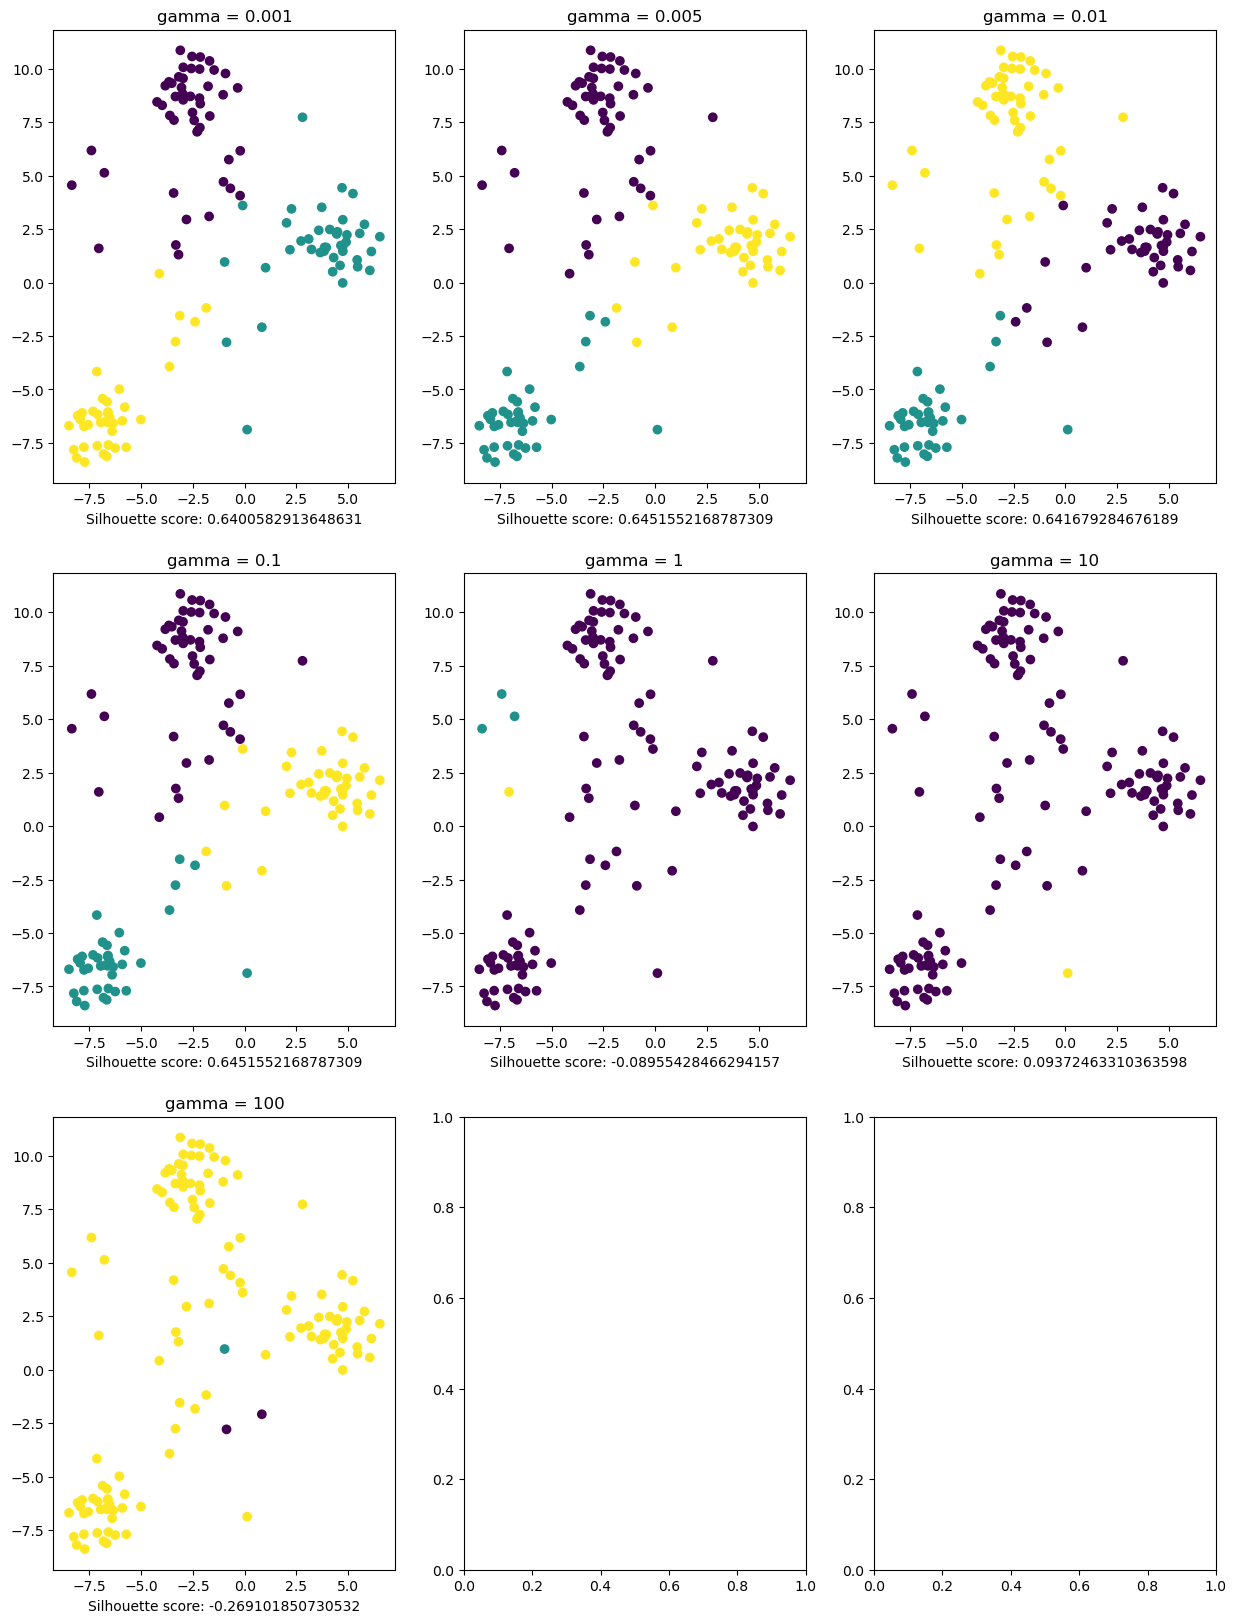

[ 8.41225064 12.7188425 ]
[-10.09459366  -9.90980404]


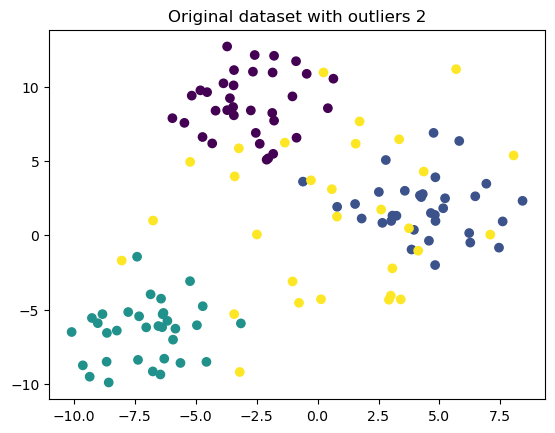

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.43995889e-14 2.01364926e-06 7.68818373e-06 1.77037744e-05]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 1737 instead with accuracy 
2.682369523792289e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[7.58612867e-15 5.85766773e-07 2.93428123e-06 7.20942915e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct 

Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [1 2]


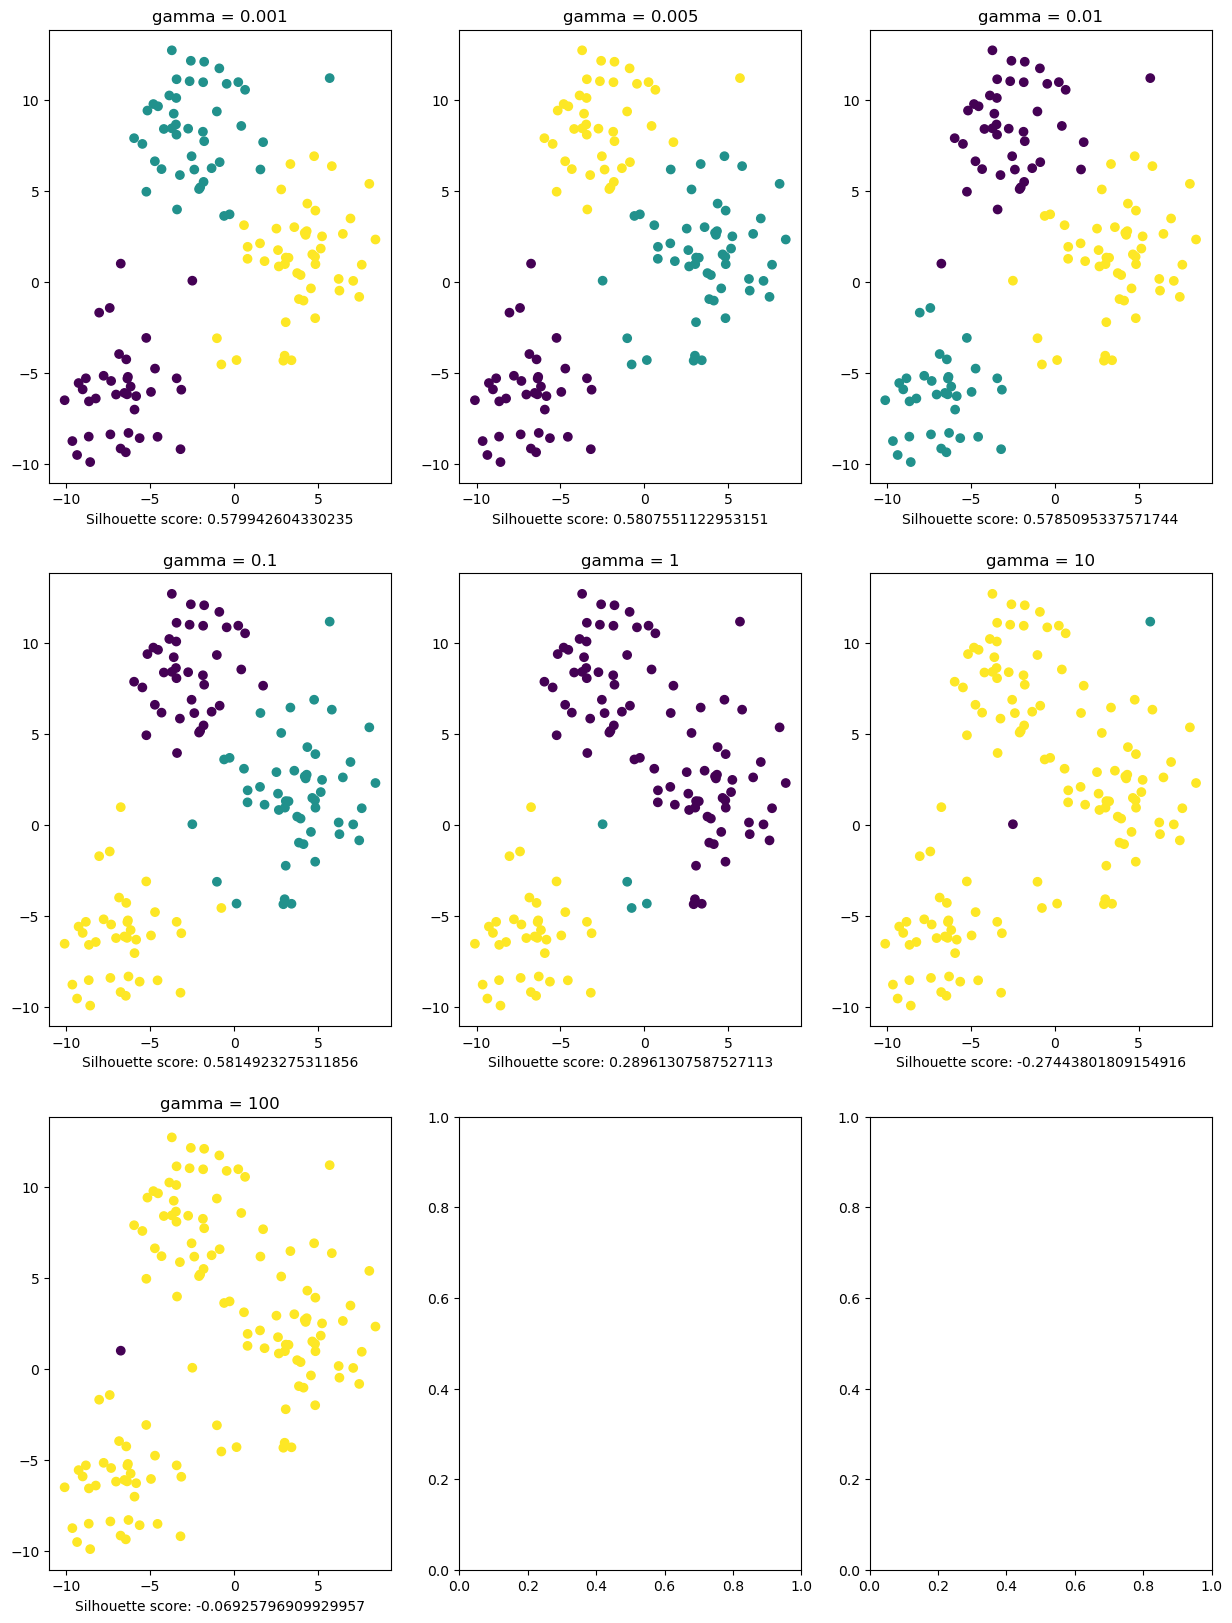

[14.07080834 18.27567705]
[-14.91704336 -14.45434572]


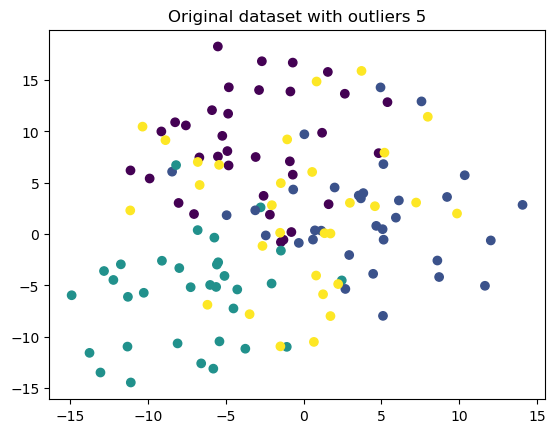

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]
Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


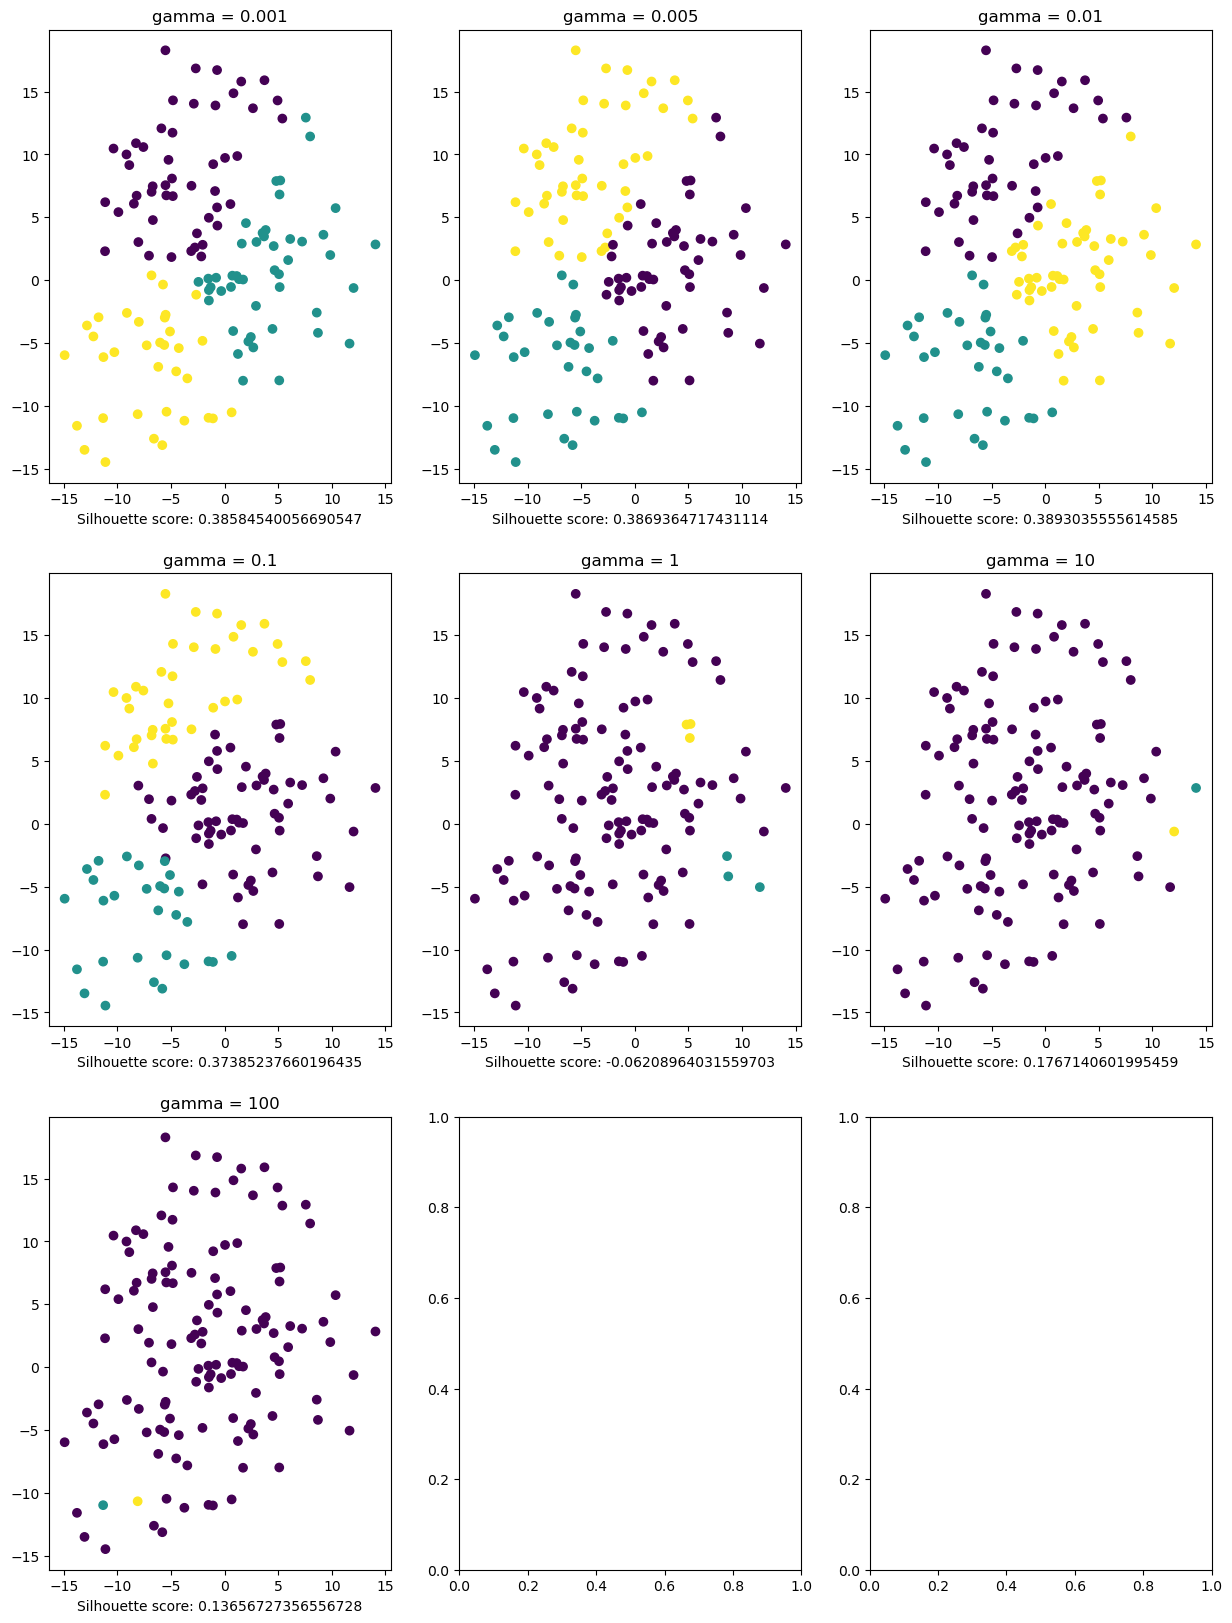

[23.50173785 27.53706797]
[-22.95445954 -22.02858184]


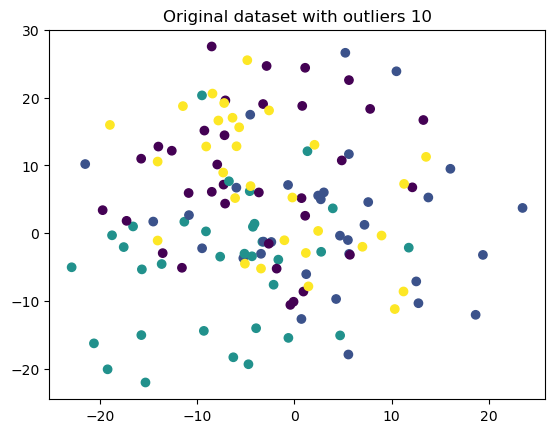

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.30883693e-14 8.45178616e-07 7.75849950e-06 7.33322232e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 1573 instead with accuracy 
2.006400497760365e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.07447625e-15 1.19954207e-06 3.44671641e-06 3.37934349e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(


Unique labels for gamma = 1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 10: [0 1]
Unique labels for gamma = 100: [0 1 2]


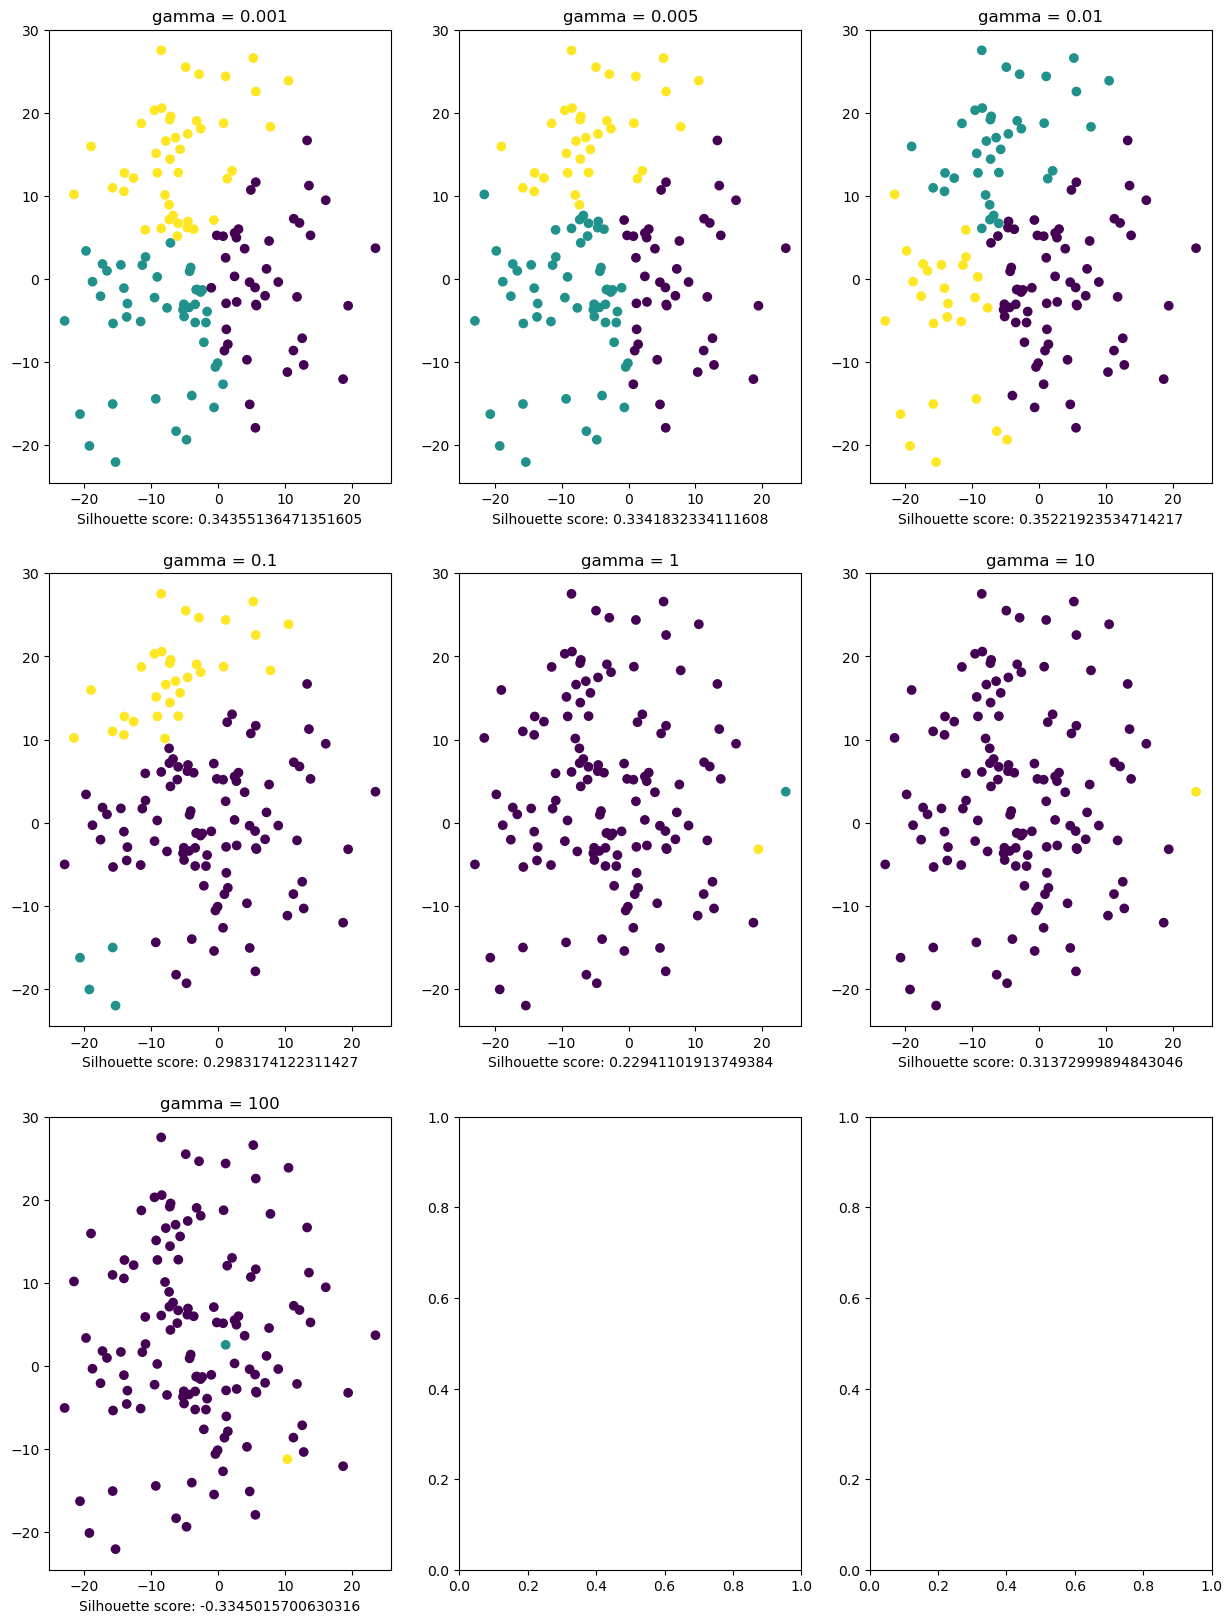

[42.36359686 51.23801193]
[-47.75502325 -37.77820861]


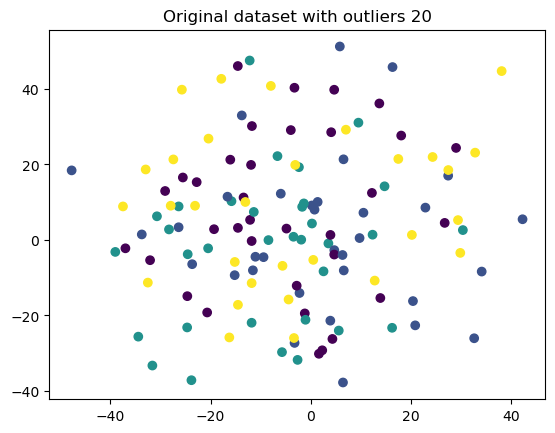

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]
Unique labels for gamma = 0.1: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


Unique labels for gamma = 1: [0 1]
Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [1 2]


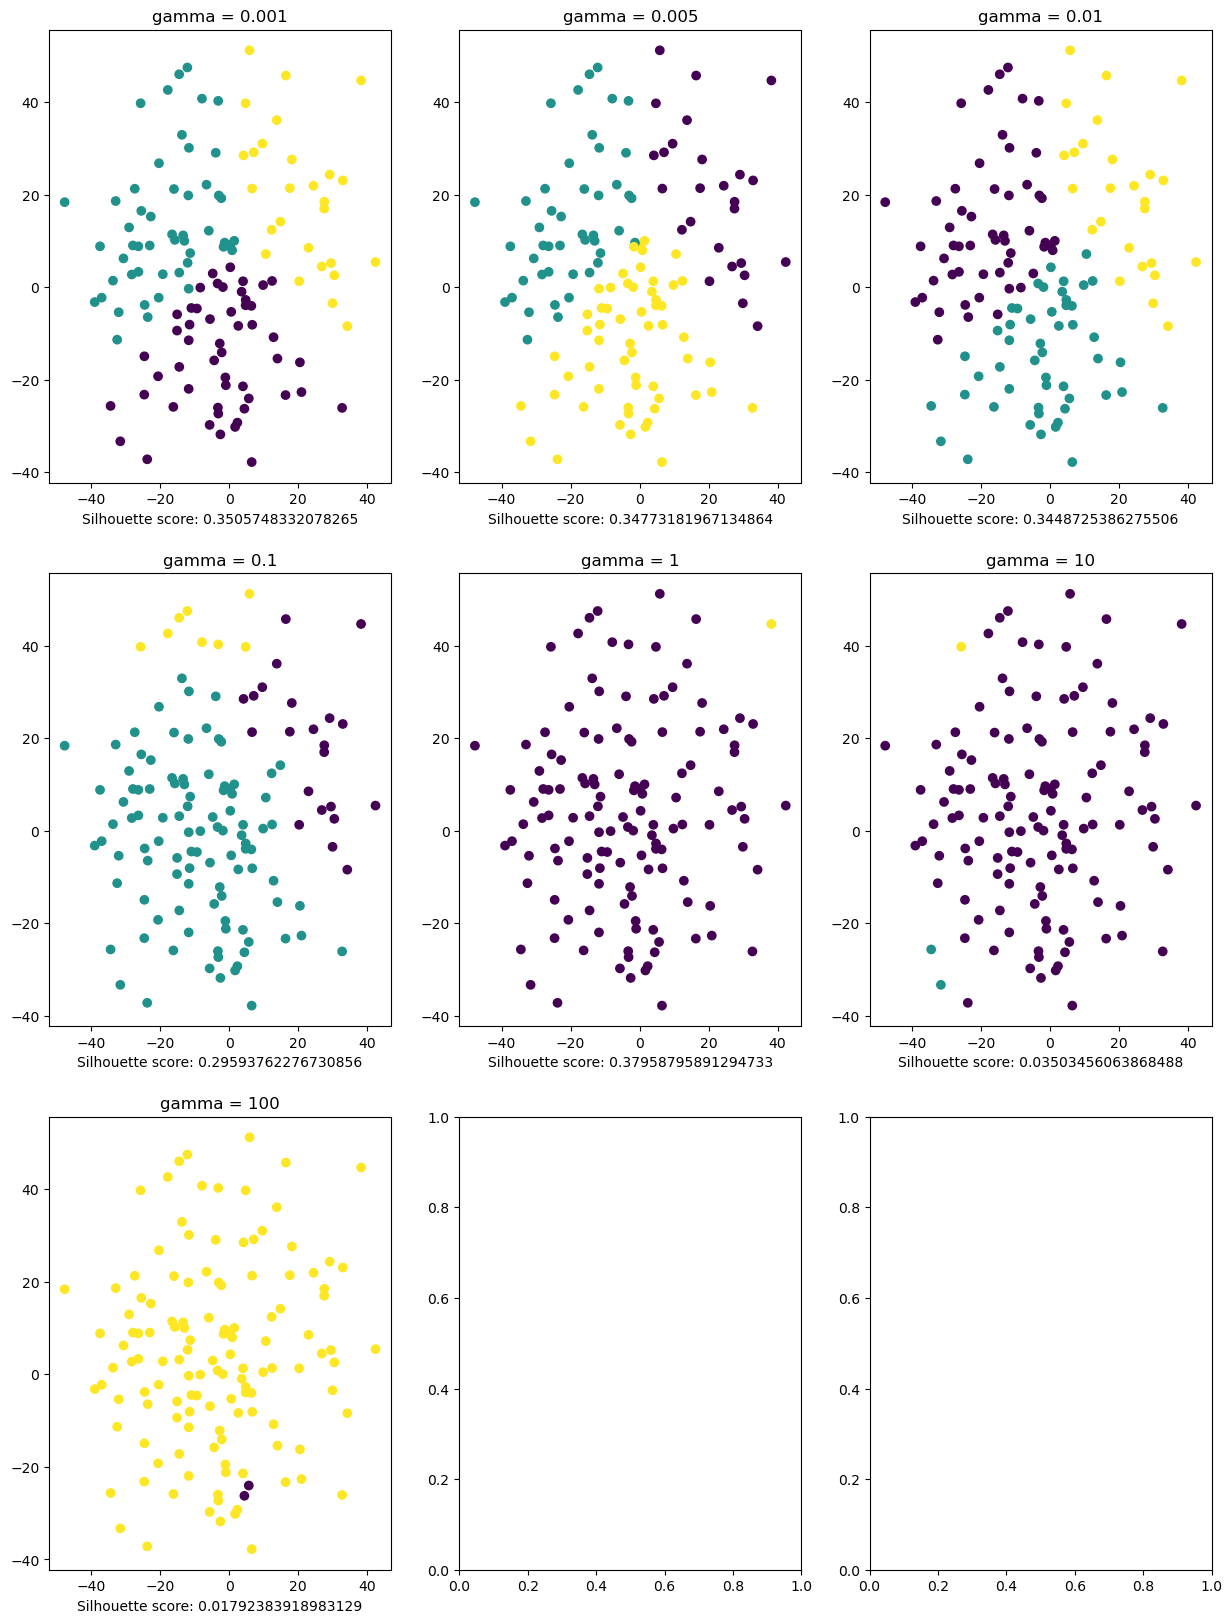

[ 98.9491739  129.12834874]
[-126.34737637  -97.40527605]


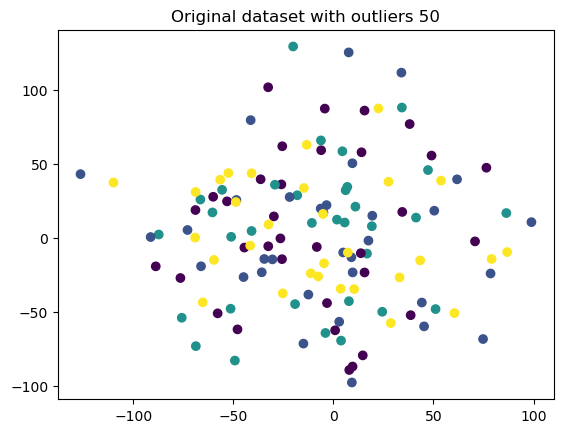

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]
Unique labels for gamma = 0.01: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 235 with accuracies 
[2.78876226e-13 4.48791775e-06 3.01007280e-05 1.73203631e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 145 instead with accuracy 
2.9290986827764236e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.29919326e-14 6.84157389e-07 4.33903423e-06 6.69320302e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Unique labels for gamma = 0.1: [0 1 2]
Unique labels for gamma = 1: [0 1 2]
Unique labels for gamma = 10: [0 1 2]
Unique labels for gamma = 100: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


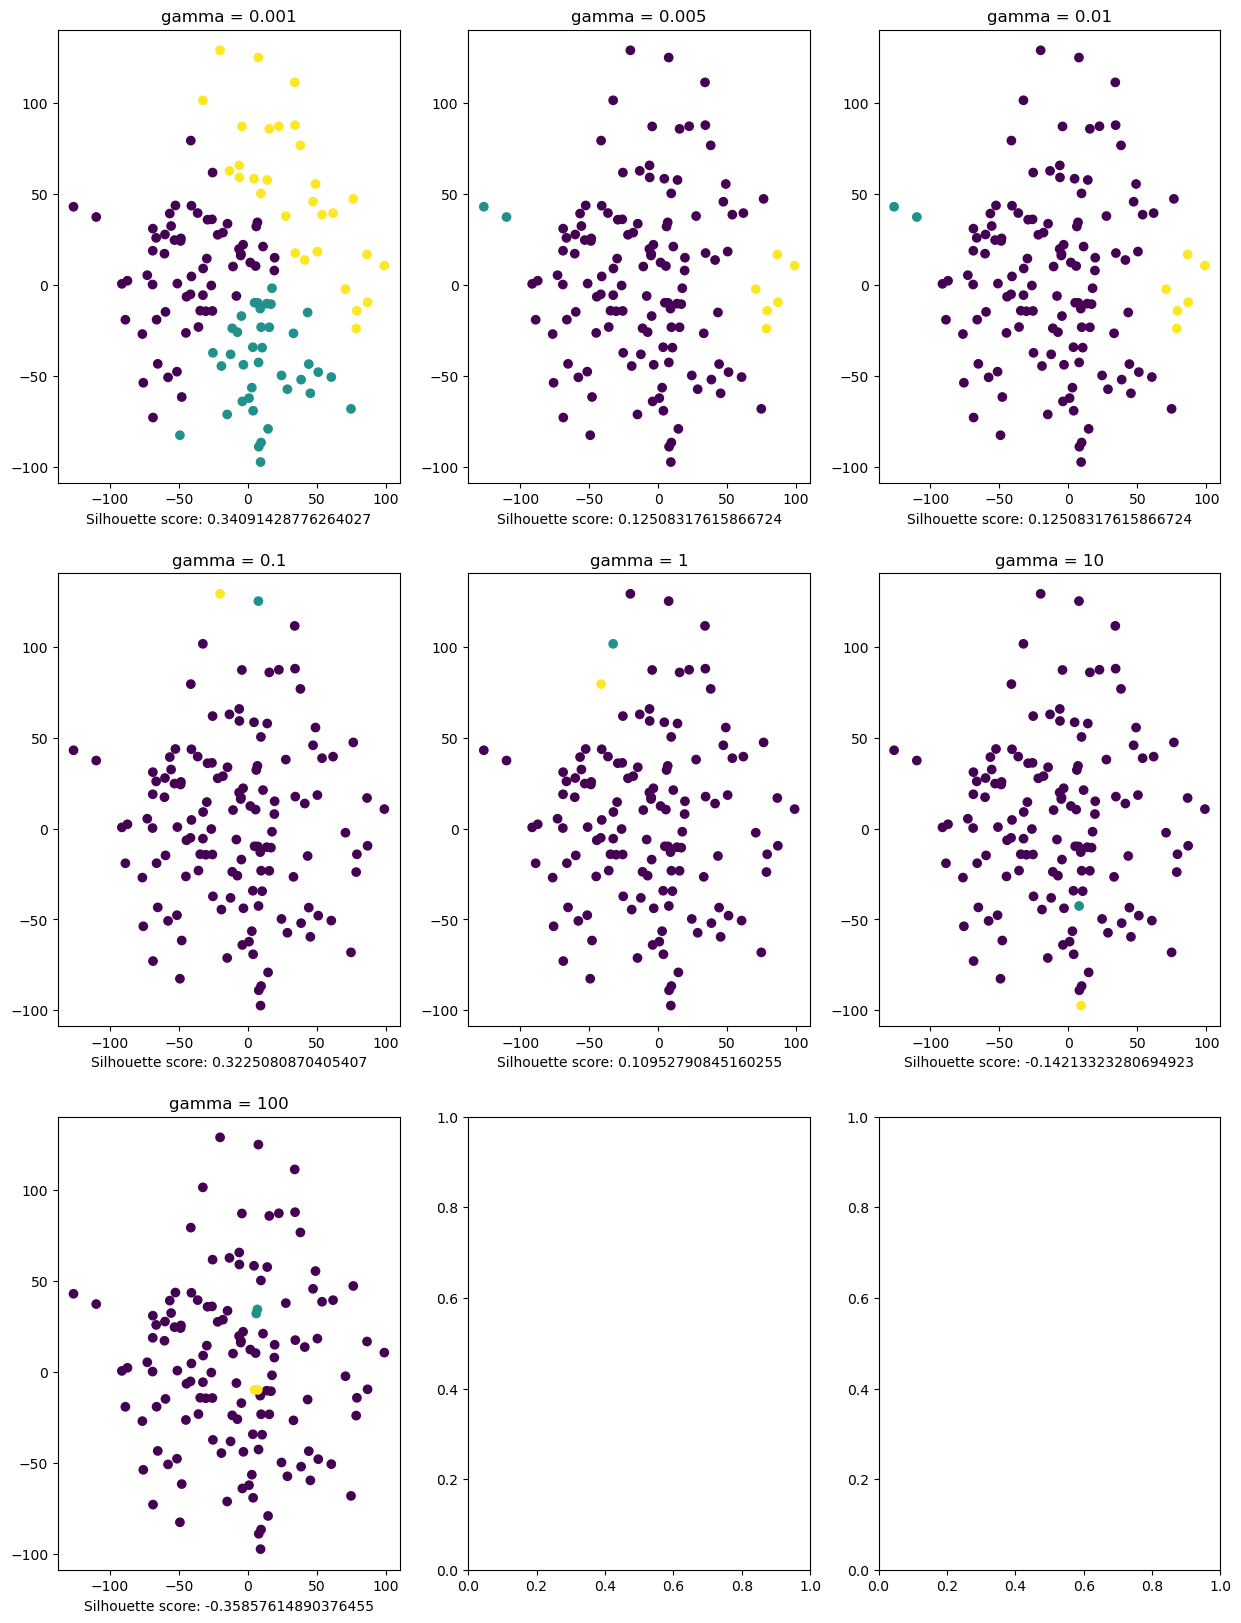

[193.25846896 265.13680707]
[-257.33463157 -196.78372178]


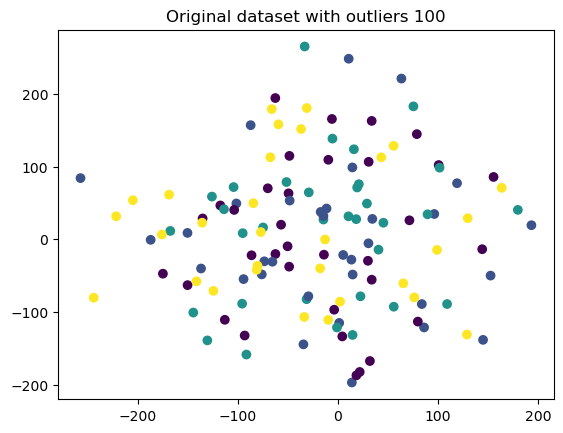

Unique labels for gamma = 0.001: [0 1 2]
Unique labels for gamma = 0.005: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[8.86074005e-15 1.07682546e-06 3.29656242e-06 8.53865433e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
Use iteration 1881 instead with accuracy 
2.9426554697471952e-06.

  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[5.19897236e-15 9.59911232e-07 2.99360339e-06 7.81710750e-06]
not reaching the requested tolerance 1.9371509552001953e-06.
  _, diffusion_map = lobpcg(


Unique labels for gamma = 0.01: [0 1 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected,

Unique labels for gamma = 0.1: [0 1]
Unique labels for gamma = 1: [0 1 2]
Unique labels for gamma = 10: [0 1]
Unique labels for gamma = 100: [0 1 2]


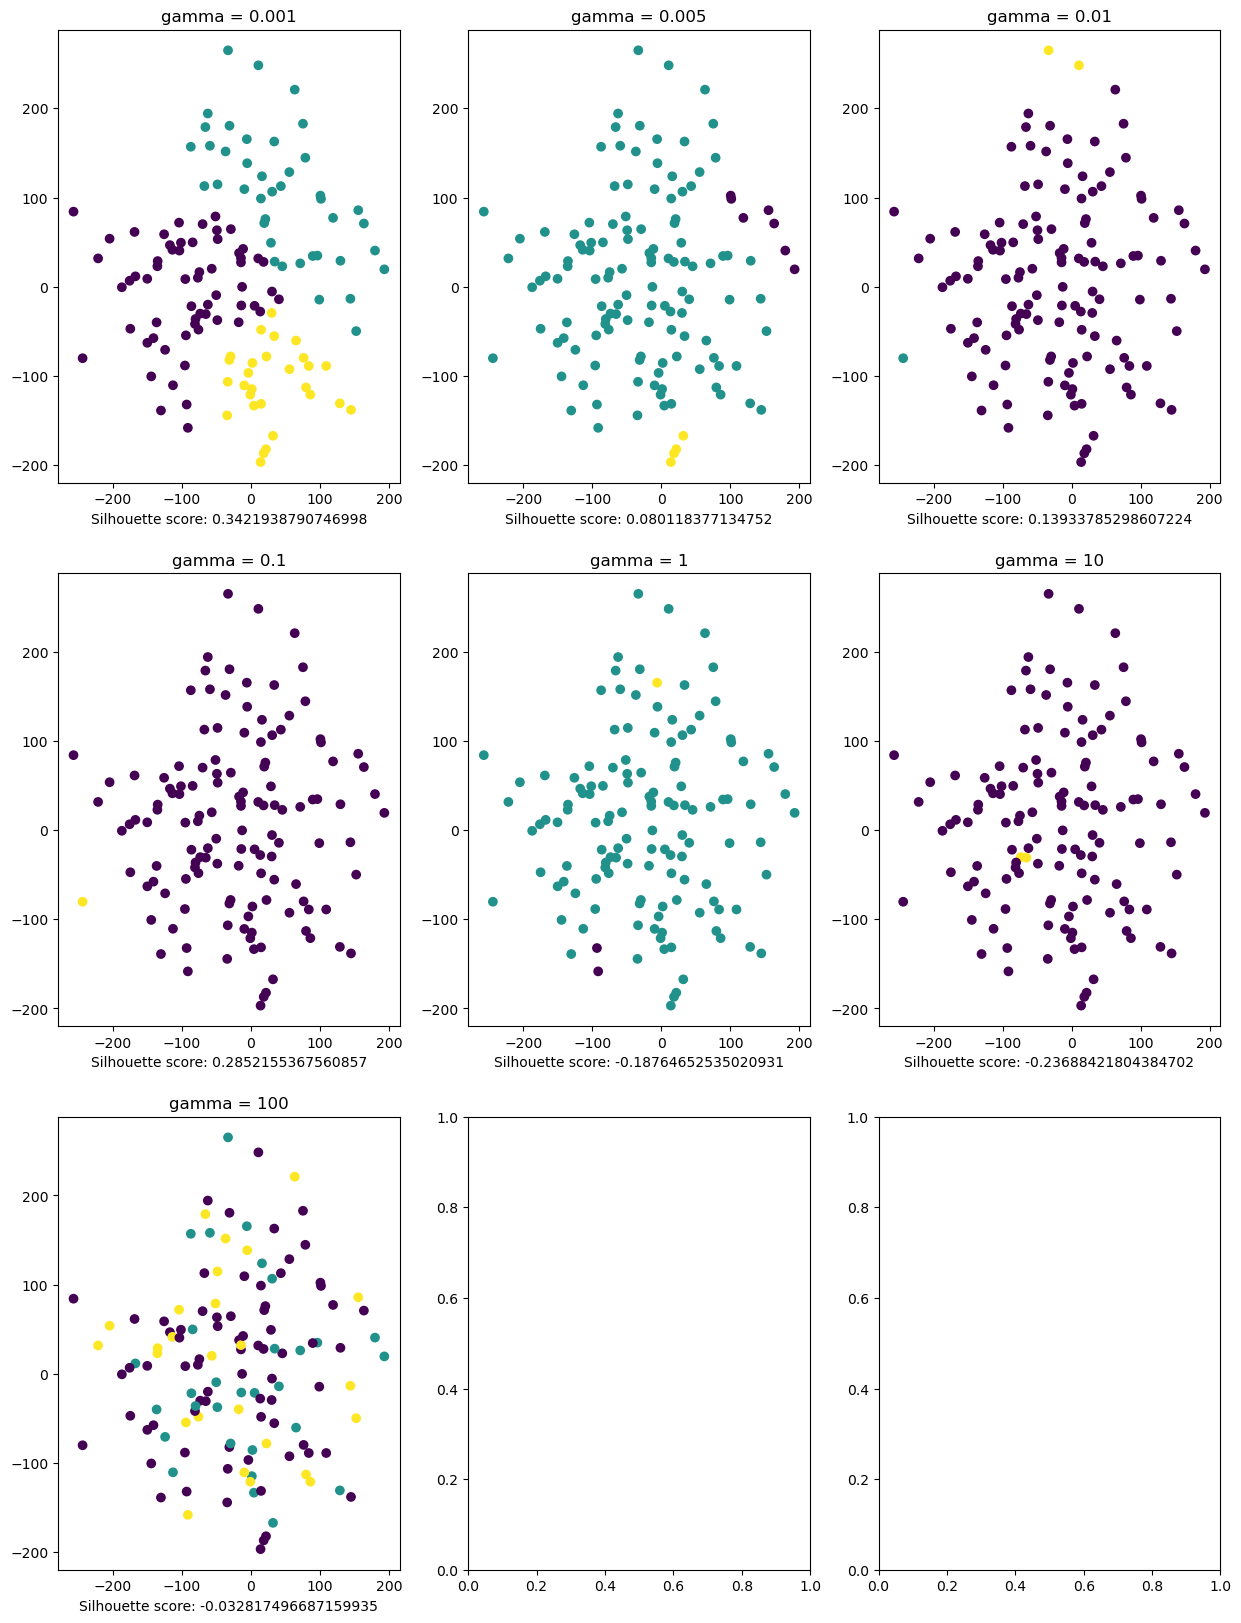

In [58]:
groups = 3
samples = 100
percentage_outliers = 0.3
cluster_std = 1.5
gamma_values = [0.001, 0.005, 0.01, 0.1, 1, 10, 100]

# Effect of clustering std
cluster_stds = [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
for std in cluster_stds:
    X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                    cluster_std = std)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.title("Original dataset with outliers " + str(std))
    plt.show()
    plot_spectral_clustering(X, groups, gamma_values)

In [ ]:
answer = """
How do the results vary with greater/smaller percentage of outliers? 
"""
send(answer, 31)

answer = """
What is the effect of the clustering standard deviation? 
"""
send(answer, 32)

answer = """
How is the effect of the group size (sample)?
"""
send(answer, 33)
